In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

In [3]:
model_r = ResNet50(weights='imagenet',include_top = False,input_shape = (224,224,3))

In [4]:
x  = model_r.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024,activation = 'relu')(x)
predictions = Dense(2,activation = 'softmax')(x)

model = Model(inputs = model_r.input,outputs = predictions)

In [5]:
for layer in model_r.layers:
    layer.trainable = False

In [6]:
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [7]:
IMAGE_SIZE = (224,224)
BATCH_SIZE = 32
NUM_CLASSES = 2
EPOCHS = 25

train_dir = 'Dataset/train'
val_dir = 'Dataset/valid'
test_dir = 'Dataset/test'


In [8]:
# Data Augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'
)

test_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)


Found 1661 images belonging to 2 classes.
Found 415 images belonging to 2 classes.
Found 231 images belonging to 2 classes.


In [9]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    validation_data=val_generator,
    validation_steps=val_generator.samples // BATCH_SIZE,
    epochs=EPOCHS
)

Epoch 1/25


C:\Users\jayesh\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


51/51 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step - accuracy: 0.4907 - loss: 1.5828 - val_accuracy: 0.4948 - val_loss: 0.8516
Epoch 2/25
 1/51 ━━━━━━━━━━━━━━━━━━━━ 1:07 1s/step - accuracy: 0.5938 - loss: 0.7359

C:\Users\jayesh\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.5938 - loss: 0.7359 - val_accuracy: 0.5161 - val_loss: 0.7041
Epoch 3/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 96s 2s/step - accuracy: 0.5149 - loss: 0.8233 - val_accuracy: 0.7422 - val_loss: 0.6742
Epoch 4/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.7500 - loss: 0.6652 - val_accuracy: 0.5484 - val_loss: 0.6609
Epoch 5/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 102s 2s/step - accuracy: 0.5141 - loss: 0.7504 - val_accuracy: 0.4844 - val_loss: 0.7115
Epoch 6/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 28ms/step - accuracy: 0.5000 - loss: 0.7012 - val_accuracy: 0.3871 - val_loss: 0.7553
Epoch 7/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5531 - loss: 0.7150 - val_accuracy: 0.4896 - val_loss: 0.8100
Epoch 8/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.5625 - loss: 0.7435 - val_accuracy: 0.5484 - val_loss: 0.6799
Epoch 9/25
51/51 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.5611 - loss: 0.6973 - val_accuracy: 0.5365 - val_loss: 0.668

In [50]:
from tensorflow.keras.preprocessing import image
import numpy as np
def predict_image(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.

    prediction = model.predict(img_array)
    class_idx = np.argmax(prediction, axis=1)[0]
    class_labels = ['DR','NO_DR']
    return class_labels[class_idx]

# Example prediction


image_path = file_path = 'Dataset/valid/DR/e1e490773462_png.rf.31996bf21f1732dc35adf2337d53d3e7.jpg'
print(image_path)
predicted_class = predict_image(image_path)
img.show()
print(f'The predicted class is: {predicted_class}')


Dataset/valid/DR/e1e490773462_png.rf.31996bf21f1732dc35adf2337d53d3e7.jpg


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 224, 224, 3), dtype=float32). Expected shape (None, 100), but input has incompatible shape (1, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [52]:
from tensorflow.keras.preprocessing import image
from PIL import Image
import numpy as np

# Define the image size your model expects
IMAGE_SIZE = (224, 224)

# Prediction function
def predict_image(image_path):
    img = image.load_img(image_path, target_size=IMAGE_SIZE)  # Load and resize the image
    img_array = image.img_to_array(img)  # Convert image to numpy array
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize the image

    prediction = model.predict(img_array)  # Make prediction
    class_idx = np.argmax(prediction, axis=1)[0]  # Get the predicted class index
    class_labels = ['DR', 'NO_DR']  # Adjust based on your dataset
    return img, class_labels[class_idx]  # Return the image and the predicted class

# Example usage
image_path = 'Dataset/valid/DR/e1e490773462_png.rf.31996bf21f1732dc35adf2337d53d3e7.jpg'
print(image_path)

img, predicted_class = predict_image(image_path)

# Display the image
img.show()

# Print the predicted class
print(f'The predicted class is: {predicted_class}')


Dataset/valid/DR/e1e490773462_png.rf.31996bf21f1732dc35adf2337d53d3e7.jpg


ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("data:0", shape=(1, 224, 224, 3), dtype=float32). Expected shape (None, 100), but input has incompatible shape (1, 224, 224, 3)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(1, 224, 224, 3), dtype=float32)
  • training=False
  • mask=None

In [36]:
acc =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss =history.history['loss']
val_loss =history.history['val_loss']

In [44]:
print("Accuracy = ",acc)
print("Validation Accuracy = ",val_acc)
print("loss = ",loss)
print("validation loss = ",val_loss)

Accuracy =  [0.4996930658817291, 0.59375, 0.514426052570343, 0.75, 0.523634135723114, 0.5, 0.5457335710525513, 0.5625, 0.5488029718399048, 0.625, 0.5575980544090271, 0.7931034564971924, 0.5377532243728638, 0.53125, 0.5389809608459473, 0.5625, 0.5764272809028625, 0.65625, 0.589318573474884, 0.6875, 0.5837937593460083, 0.4375, 0.6046654582023621, 0.71875, 0.6255371570587158]
Validation Accuracy =  [0.4947916567325592, 0.5161290168762207, 0.7421875, 0.5483871102333069, 0.484375, 0.3870967626571655, 0.4895833432674408, 0.5483871102333069, 0.5364583134651184, 0.5161290168762207, 0.7864583134651184, 0.5483871102333069, 0.5026041865348816, 0.7096773982048035, 0.5338541865348816, 0.5161290168762207, 0.5703125, 0.5161290168762207, 0.5130208134651184, 0.4838709533214569, 0.4947916567325592, 0.5483871102333069, 0.734375, 0.6129032373428345, 0.6484375]
loss =  [1.127377986907959, 0.735896646976471, 0.8292347192764282, 0.6652286052703857, 0.7477132678031921, 0.701181948184967, 0.7227984666824341, 0

Text(0.5, 1.0, 'Training and validation accuracy')

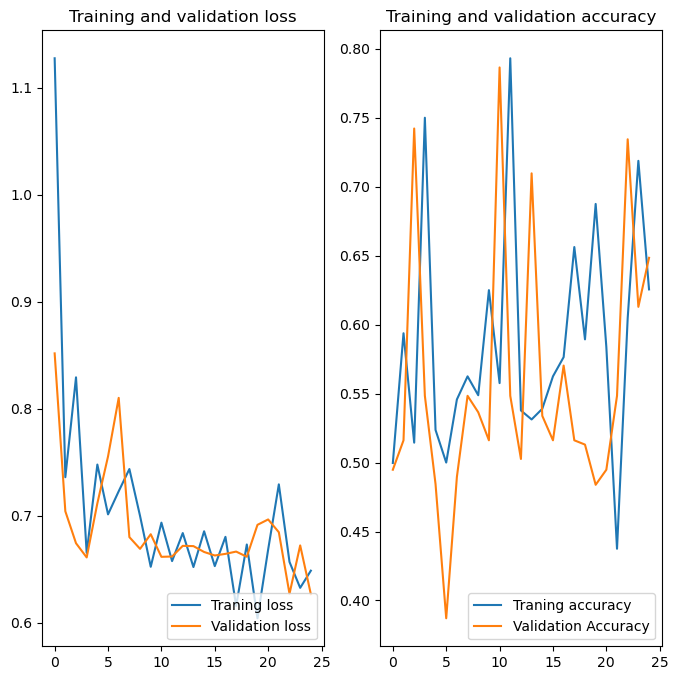

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,8))
plt.subplot(1,2,1)
plt.plot(range(EPOCHS),loss,label = "Traning loss")
plt.plot(range(EPOCHS),val_loss,label="Validation loss")
plt.legend(loc="lower right")
plt.title("Training and validation loss")

plt.subplot(1,2,2)
plt.plot(range(EPOCHS),acc,label = "Traning accuracy")
plt.plot(range(EPOCHS),val_acc,label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and validation accuracy")


In [46]:
import tensorflow as tf

# Assume you have a trained Keras model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(100,)),
    tf.keras.layers.Dense(1)
])
# Save the model in H5 format
model.save("resenet.h5")
print("Model saved as 'resenet50.h5'")

Model saved as 'resenet50.h5'
